In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv', index_col = 0 )

In [3]:
data.head()

,score,duration,active,neutral,calm,
date,,,,,,
1/13,54.0,10,NaN,NaN,NaN,NaN
1/15,64.0,20,NaN,NaN,NaN,NaN
1/18,40.0,20,NaN,NaN,NaN,NaN
1/19,53.0,20,NaN,NaN,NaN,NaN
1/20,41.0,20,NaN,NaN,NaN,NaN


In [4]:
# we want only the data where we have two measurements for the same day
paired_index = data.groupby('date').count()['score'] > 1

In [5]:
paired_data = data[paired_index]

<ipython-input-5-a6a366ea5f2d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paired_data = data[paired_index]


In [6]:
paired_data.head()

,score,duration,active,neutral,calm,
date,,,,,,
4/13,98.0,10,NaN,NaN,NaN,NaN
4/13,21.0,10,NaN,NaN,NaN,NaN
4/14,37.0,10,NaN,NaN,NaN,NaN
4/14,96.0,10,NaN,NaN,NaN,NaN
4/16,45.0,10,NaN,NaN,NaN,NaN


In [7]:
scores_session_1 = []
scores_session_2 = []
for score_pair in paired_data.groupby('date')['score']:
    scores_session_1.append(score_pair[1][0])
    scores_session_2.append(score_pair[1][1])

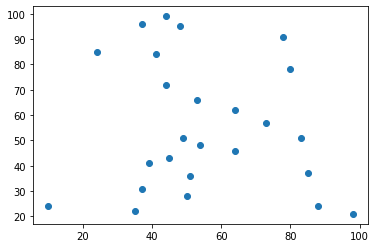

In [8]:
plt.scatter(scores_session_1, scores_session_2)

In [9]:
pearsonr(scores_session_1, scores_session_2)

(-0.12649213516914343, 0.5468352141185786)